**Import Libraries**

In [35]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


**Read and Explore the data**

In [11]:
# Load the dataset
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Summary Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.69561

**Features And Target**

In [13]:
# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

**Splitting The Dataset: Train and Test dataset**

In [14]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Feature Scaling**

In [15]:
#normalize the training data (X_train)
# and determine its mean and standard deviation.
# Then, itstandardizes the testing data (X_test)
# using the calculated mean and standard deviation from the training set.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Train The Model**

In [16]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Evaluation Metrics**

In [18]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 0.7951219512195122
Accuracy: 79.51%


**Confusion Matrix and Classification Report**

In [20]:
# evaluate the model
#confusion_matrix
# TN (True Negatives): Correctly predicted no disease
# TP (True Positives): Correctly predicted heart disease
# FP (False Positives): Wrongly predicted heart disease
# FN (False Negatives): Missed predicting heart disease

########################
#classification_report
# Precision = TP / (TP + FP): How many predicted positives were correct?
# Recall = TP / (TP + FN): How many actual positives were caught?
# F1-score = Harmonic mean of precision & recall
# Accuracy = (TP + TN) / Total predictions

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[73 29]
 [13 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



**Visualizing the performance of our model.**

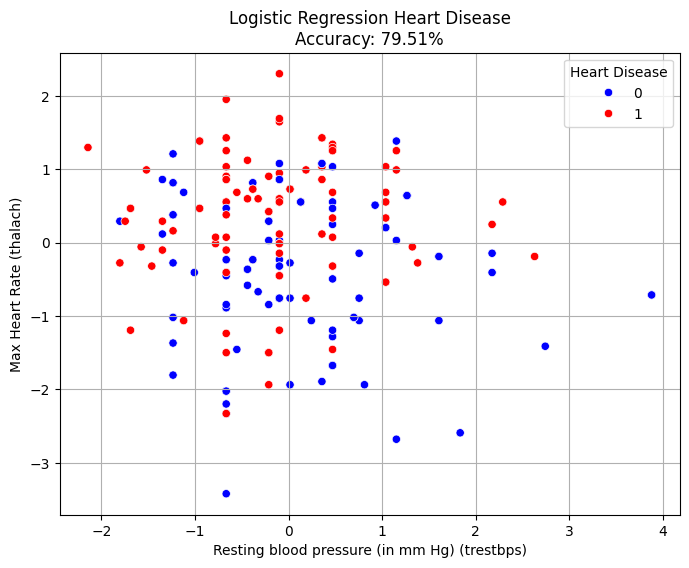

In [31]:
# Visualize the Heart Disease with accuracy information
# Visualize two meaningful features: 'trestbps' (Resting blood pressure (in mm Hg)) vs 'thalach' (max heart rate)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_test[:, X.columns.get_loc('trestbps')],
    y=X_test[:, X.columns.get_loc('thalach')],
    hue=y_test,
    palette={0: 'blue', 1: 'red'},
    marker='o'
)
plt.title("Logistic Regression Heart Disease\nAccuracy: {:.2f}%".format(accuracy * 100))
plt.xlabel("Resting blood pressure (in mm Hg) (trestbps)")
plt.ylabel("Max Heart Rate (thalach)")
plt.legend(title="Heart Disease", loc="upper right")
plt.grid(True)
plt.show()

**Plotting ROC Curve**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


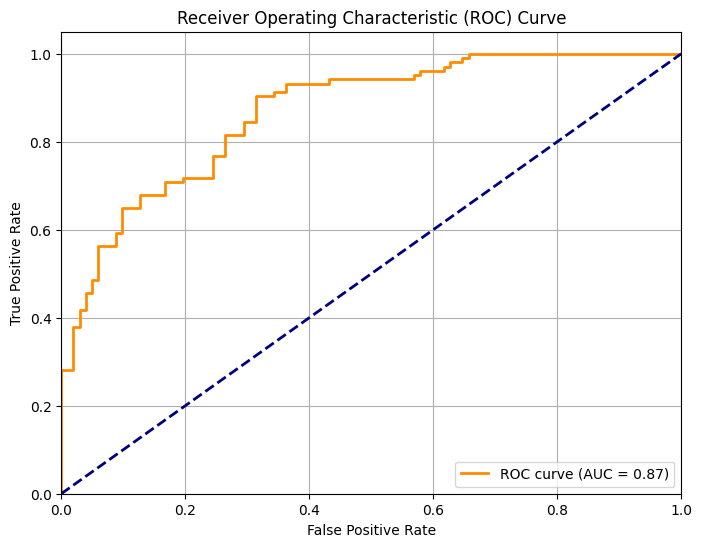

In [36]:
# Apply scaling to X_test and store it in X_test_scaled
X_test_scaled = scaler.transform(X_test)

# Get predicted probabilities for the positive class (1 = heart disease)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
